## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step-1: Importing required modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import the statsmodel and its corresponding modules
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

#Import the sklearn and its corresponding modules
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

### Step-2: Reading and understanding the data

In [ ]:
churn = pd.read_csv('churn_data.csv')
churn.head()

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0           Electronic check           29.85        29.85    No  
1               Mailed check           56.95       1889.5    No  
2               Mailed check           53.85       108.15   Yes  
3  Bank transfer (automatic)           42.30      1840.75    No  
4           Electronic check           70.70       151.65   Yes

In [ ]:
customer = pd.read_csv('customer_data.csv')
customer.head()

customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

In [ ]:
internet = pd.read_csv('internet_data.csv')
internet.head()

customerID     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  7590-VHVEG  No phone service             DSL             No          Yes   
1  5575-GNVDE                No             DSL            Yes           No   
2  3668-QPYBK                No             DSL            Yes          Yes   
3  7795-CFOCW  No phone service             DSL            Yes           No   
4  9237-HQITU                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies  
0               No          No          No              No  
1              Yes          No          No              No  
2               No          No          No              No  
3              Yes         Yes          No              No  
4               No          No          No              No

Merge the above 3 dataframes to a single frame

In [ ]:
df = pd.merge(churn, customer, on='customerID')
df.head()

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  gender  \
0           Electronic check           29.85        29.85    No  Female   
1               Mailed check           56.95       1889.5    No    Male   
2               Mailed check           53.85       108.15   Yes    Male   
3  Bank transfer (automatic)           42.30      1840.75    No    Male   
4           Electronic check           70.70       151.65   Yes  Female   

   SeniorCitizen Partner Dependents  
0              0     Yes         No  
1              0      No         No  
2              0      No         No  
3              0      No         No  
4              0      No         No

In [ ]:
telecom = pd.merge(df, internet, on='customerID')
telecom.head()

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  gender  ...  \
0           Electronic check           29.85        29.85    No  Female  ...   
1               Mailed check           56.95       1889.5    No    Male  ...   
2               Mailed check           53.85       108.15   Yes    Male  ...   
3  Bank transfer (automatic)           42.30      1840.75    No    Male  ...   
4           Electronic check           70.70       151.65   Yes  Female  ...   

   Partner Dependents     MultipleLines InternetService OnlineSecurity  \
0      Yes         No  No phone service             DSL             No   
1       No         No                No             DSL            Yes   
2       No         No                No             DSL            Yes   
3       No         No  No phone service             DSL            Yes   
4       No         No                No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  
0          Yes               No          No          No              No  
1           No              Yes          No          No              No  
2          Yes               No          No          No              No  
3           No              Yes         Yes          No              No  
4           No               No          No          No              No  

[5 rows x 21 columns]

In [ ]:
#Write the concatenated csv to a file called telecom_data.csv
telecom.to_csv('telecom_data.csv', index=False)

In [ ]:
telecom.shape

(7043, 21)

In [ ]:
telecom.describe()

tenure  MonthlyCharges  SeniorCitizen
count  7043.000000     7043.000000    7043.000000
mean     32.371149       64.761692       0.162147
std      24.559481       30.090047       0.368612
min       0.000000       18.250000       0.000000
25%       9.000000       35.500000       0.000000
50%      29.000000       70.350000       0.000000
75%      55.000000       89.850000       0.000000
max      72.000000      118.750000       1.000000

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step-3: Visualizations of data

In [ ]:
cat_columns = ['PhoneService','PaperlessBilling','Churn','Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','gender','MultipleLines','InternetService']

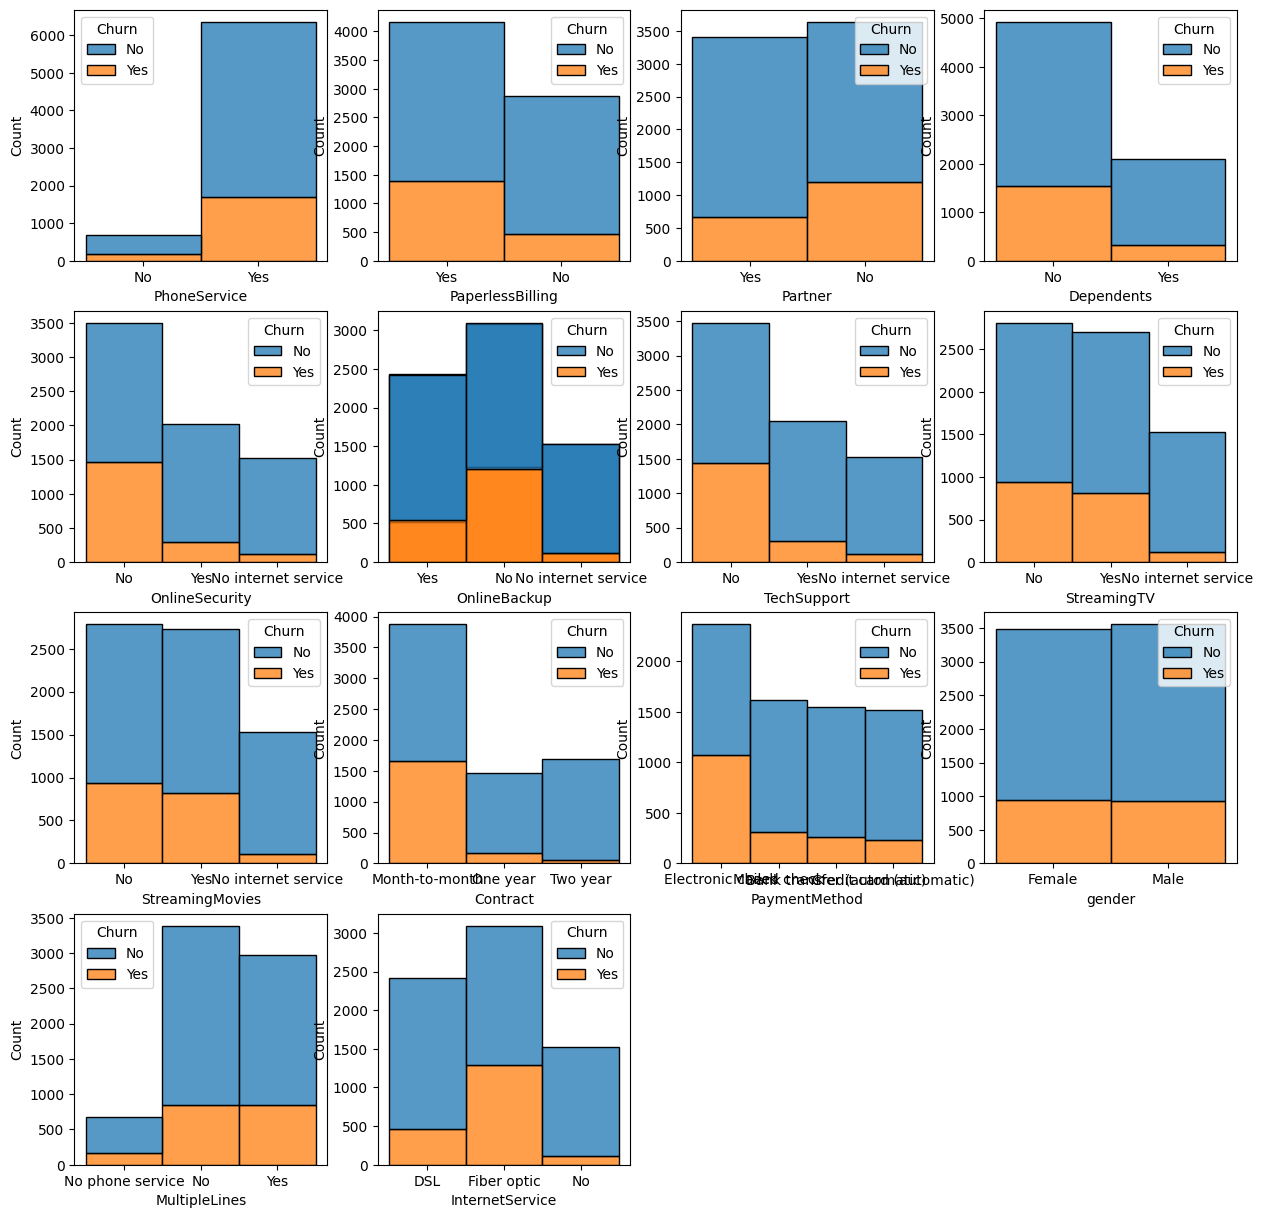

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(4,4,1)
sns.histplot(binwidth=0.5, x="PhoneService", hue="Churn", data=telecom, stat="count", multiple="stack")

plt.subplot(4,4,2)
sns.histplot(binwidth=0.5, x="PaperlessBilling", hue="Churn", data=telecom, stat="count", multiple="stack")

plt.subplot(4,4,3)
sns.histplot(binwidth=0.5, x="Partner", hue="Churn", data=telecom, stat="count", multiple="stack")

plt.subplot(4,4,4)
sns.histplot(binwidth=0.5, x="Dependents", hue="Churn", data=telecom, stat="count", multiple="stack")

plt.subplot(4,4,5)
sns.histplot(binwidth=0.5, x="OnlineSecurity", hue="Churn", data=telecom, stat="count", multiple="stack")

plt.subplot(4,4,6)
sns.histplot(binwidth=0.5, x="OnlineBackup", hue="Churn", data=telecom, stat="count", multiple="stack")

plt.subplot(4,4,6)
sns.histplot(binwidth=0.5, x="DeviceProtection", hue="Churn", data=telecom, stat="count", multiple="stack")

plt.subplot(4,4,7)
sns.histplot(binwidth=0.5, x="TechSupport", hue="Churn", data=telecom, stat="count", multiple="stack")

plt.subplot(4,4,8)
sns.histplot(binwidth=0.5, x="StreamingTV", hue="Churn", data=telecom, stat="count", multiple="stack")

plt.subplot(4,4,9)
sns.histplot(binwidth=0.5, x="StreamingMovies", hue="Churn", data=telecom, stat="count", multiple="stack")

plt.subplot(4,4,10)
sns.histplot(binwidth=0.5, x="Contract", hue="Churn", data=telecom, stat="count", multiple="stack")

plt.subplot(4,4,11)
sns.histplot(binwidth=0.5, x="PaymentMethod", hue="Churn", data=telecom, stat="count", multiple="stack")

plt.subplot(4,4,12)
sns.histplot(binwidth=0.5, x="gender", hue="Churn", data=telecom, stat="count", multiple="stack")

plt.subplot(4,4,13)
sns.histplot(binwidth=0.5, x="MultipleLines", hue="Churn", data=telecom, stat="count", multiple="stack")

plt.subplot(4,4,14)
sns.histplot(binwidth=0.5, x="InternetService", hue="Churn", data=telecom, stat="count", multiple="stack")

plt.show()

In [ ]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')

In [ ]:
telecom.describe()

tenure  MonthlyCharges  TotalCharges  SeniorCitizen
count  7043.000000     7043.000000   7032.000000    7043.000000
mean     32.371149       64.761692   2283.300441       0.162147
std      24.559481       30.090047   2266.771362       0.368612
min       0.000000       18.250000     18.800000       0.000000
25%       9.000000       35.500000    401.450000       0.000000
50%      29.000000       70.350000   1397.475000       0.000000
75%      55.000000       89.850000   3794.737500       0.000000
max      72.000000      118.750000   8684.800000       1.000000

In [ ]:
num_columns = ['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']

In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
telecom[num_columns].describe(percentiles=[.25, .5, .75, .90, .95, .99])

tenure  MonthlyCharges  SeniorCitizen  TotalCharges
count  7043.000000     7043.000000    7043.000000   7032.000000
mean     32.371149       64.761692       0.162147   2283.300441
std      24.559481       30.090047       0.368612   2266.771362
min       0.000000       18.250000       0.000000     18.800000
25%       9.000000       35.500000       0.000000    401.450000
50%      29.000000       70.350000       0.000000   1397.475000
75%      55.000000       89.850000       0.000000   3794.737500
90%      69.000000      102.600000       1.000000   5976.640000
95%      72.000000      107.400000       1.000000   6923.590000
99%      72.000000      114.729000       1.000000   8039.883000
max      72.000000      118.750000       1.000000   8684.800000

<Figure size 1500x1500 with 0 Axes>

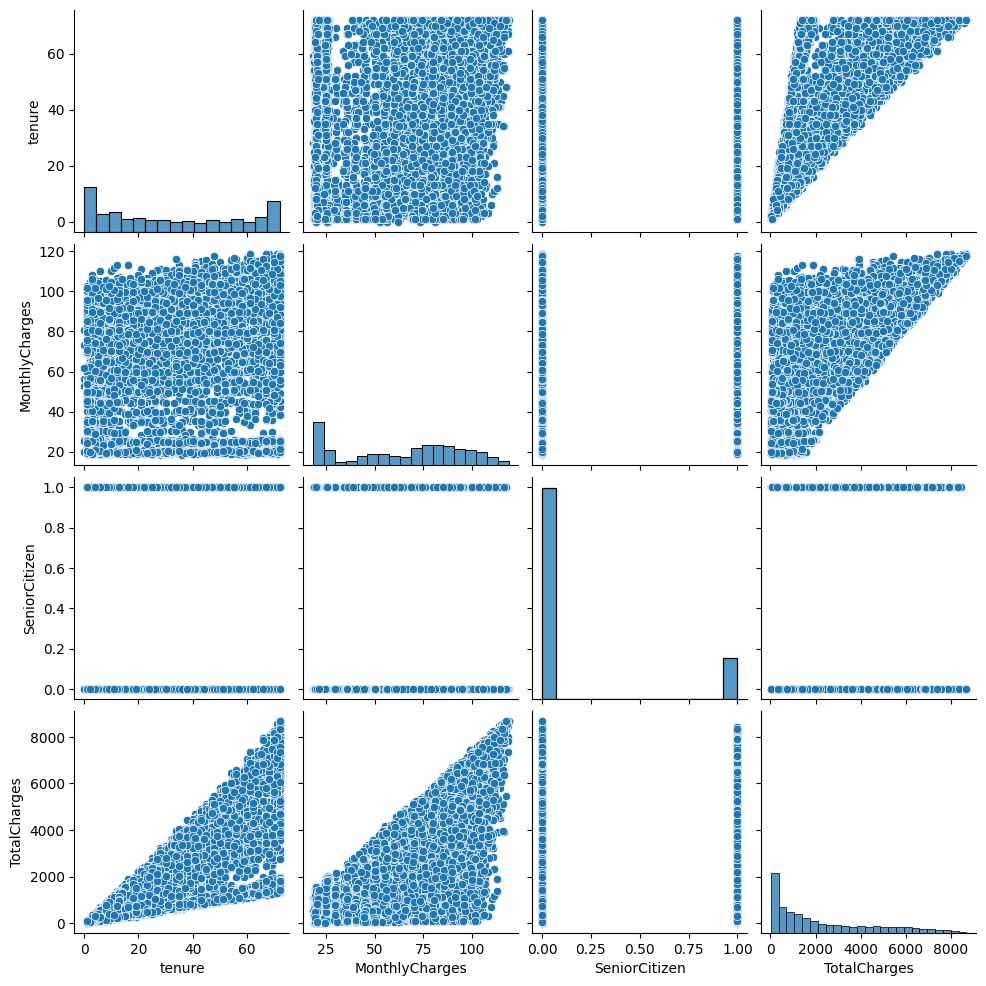

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(telecom[num_columns])
plt.show()

### Step-4: Data Preparation

**Convert binary columns(Yes/No) to 1/0**

In [ ]:
telecom.head()

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn  gender  ...  \
0           Electronic check           29.85         29.85    No  Female  ...   
1               Mailed check           56.95       1889.50    No    Male  ...   
2               Mailed check           53.85        108.15   Yes    Male  ...   
3  Bank transfer (automatic)           42.30       1840.75    No    Male  ...   
4           Electronic check           70.70        151.65   Yes  Female  ...   

   Partner Dependents     MultipleLines InternetService OnlineSecurity  \
0      Yes         No  No phone service             DSL             No   
1       No         No                No             DSL            Yes   
2       No         No                No             DSL            Yes   
3       No         No  No phone service             DSL            Yes   
4       No         No                No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  
0          Yes               No          No          No              No  
1           No              Yes          No          No              No  
2          Yes               No          No          No              No  
3           No              Yes         Yes          No              No  
4           No               No          No          No              No  

[5 rows x 21 columns]

In [ ]:
binary_var_list = ['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
telecom[binary_var_list].head()

PhoneService PaperlessBilling Churn Partner Dependents
0           No              Yes    No     Yes         No
1          Yes               No    No      No         No
2          Yes              Yes   Yes      No         No
3           No               No    No      No         No
4          Yes              Yes   Yes      No         No

In [ ]:
for i in binary_var_list:
  print(i,':',len(telecom[i].value_counts()))

PhoneService : 2
PaperlessBilling : 2
Churn : 2
Partner : 2
Dependents : 2


In [ ]:
for i in binary_var_list:
  print(i,':',telecom[i].value_counts())
  print('\n')

PhoneService : PhoneService
Yes    6361
No      682
Name: count, dtype: int64


PaperlessBilling : PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


Churn : Churn
No     5174
Yes    1869
Name: count, dtype: int64


Partner : Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents : Dependents
No     4933
Yes    2110
Name: count, dtype: int64




In [ ]:
telecom[binary_var_list] = telecom[binary_var_list].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [ ]:
telecom[binary_var_list].head()

PhoneService  PaperlessBilling  Churn  Partner  Dependents
0             0                 1      0        1           0
1             1                 0      0        0           0
2             1                 1      1        0           0
3             0                 0      0        0           0
4             1                 1      1        0           0

**Create Dummy variables for non-binary columns**

In [ ]:
non_binary_var_list1 = ['Contract', 'PaymentMethod', 'gender', 'InternetService']

In [ ]:
for i in non_binary_var_list1:
  print(i,':',len(telecom[i].value_counts()))

Contract : 3
PaymentMethod : 4
gender : 2
InternetService : 3


In [ ]:
for i in non_binary_var_list1:
  print(i,':',telecom[i].value_counts())
  print('\n')

Contract : Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


PaymentMethod : PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


gender : gender
Male      3555
Female    3488
Name: count, dtype: int64


InternetService : InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64




In [ ]:
dummy1 = pd.get_dummies(telecom[non_binary_var_list1],dtype = 'int64', drop_first=True)
dummy1.head()

Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                  1                  0   
4                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  gender_Male  InternetService_Fiber optic  \
0                           0            0                            0   
1                           1            1                            0   
2                           1            1                            0   
3                           0            1                            0   
4                           0            0                            1   

   InternetService_No  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [ ]:
telecom = pd.concat([telecom,dummy1],axis=1)
telecom.head()

customerID  tenure  PhoneService        Contract  PaperlessBilling  \
0  7590-VHVEG       1             0  Month-to-month                 1   
1  5575-GNVDE      34             1        One year                 0   
2  3668-QPYBK       2             1  Month-to-month                 1   
3  7795-CFOCW      45             0        One year                 0   
4  9237-HQITU       2             1  Month-to-month                 1   

               PaymentMethod  MonthlyCharges  TotalCharges  Churn  gender  \
0           Electronic check           29.85         29.85      0  Female   
1               Mailed check           56.95       1889.50      0    Male   
2               Mailed check           53.85        108.15      1    Male   
3  Bank transfer (automatic)           42.30       1840.75      0    Male   
4           Electronic check           70.70        151.65      1  Female   

   ...  StreamingTV  StreamingMovies  Contract_One year Contract_Two year  \
0  ...           No               No                  0                 0   
1  ...           No               No                  1                 0   
2  ...           No               No                  0                 0   
3  ...           No               No                  1                 0   
4  ...           No               No                  0                 0   

  PaymentMethod_Credit card (automatic) PaymentMethod_Electronic check  \
0                                     0                              1   
1                                     0                              0   
2                                     0                              0   
3                                     0                              0   
4                                     0                              1   

  PaymentMethod_Mailed check gender_Male InternetService_Fiber optic  \
0                          0           0                           0   
1                          1           1                           0   
2                          1           1                           0   
3                          0           1                           0   
4                          0           0                           1   

  InternetService_No  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 29 columns]

In [ ]:
telecom = telecom.drop(non_binary_var_list1,axis=1)

In [ ]:
telecom.shape

(7043, 25)

In [ ]:
non_binary_var_list2 = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']

In [ ]:
for i in non_binary_var_list2:
  print(i,':',len(telecom[i].value_counts()))

OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
MultipleLines : 3


In [ ]:
for i in non_binary_var_list2:
  print(i,':',telecom[i].value_counts())
  print('\n')

OnlineSecurity : OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


OnlineBackup : OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


DeviceProtection : DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


TechSupport : TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


StreamingTV : StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


StreamingMovies : StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


MultipleLines : MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64




In [ ]:
# Creating dummy variables for the variable 'OnlineSecurity'
col1 = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity',dtype = 'int64')

# Dropping OnlineSecurity_No internet service column
col1 = col1.drop(['OnlineSecurity_No internet service'],axis=1)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,col1],axis=1)

#Dropping the original OnlineSecurity variable from the dataframe
telecom = telecom.drop('OnlineSecurity',axis=1)

In [ ]:
# Creating dummy variables for the variable 'OnlineBackup'
col2 = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup',dtype = 'int64')

# Dropping OnlineBackup_No internet service column
col2 = col2.drop(['OnlineBackup_No internet service'],axis=1)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,col2],axis=1)

#Dropping the original OnlineBackup variable from the dataframe
telecom = telecom.drop('OnlineBackup',axis=1)

In [ ]:
# Creating dummy variables for the variable 'DeviceProtection'
col3 = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection',dtype = 'int64')

# Dropping DeviceProtection_No internet service column
col3 = col3.drop(['DeviceProtection_No internet service'],axis=1)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,col3],axis=1)

#Dropping the original DeviceProtection variable from the dataframe
telecom = telecom.drop('DeviceProtection',axis=1)

In [ ]:
# Creating dummy variables for the variable 'TechSupport'
col4 = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport',dtype = 'int64')

# Dropping TechSupport_No internet service column
col4 = col4.drop(['TechSupport_No internet service'],axis=1)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,col4],axis=1)

#Dropping the original TechSupport variable from the dataframe
telecom = telecom.drop('TechSupport',axis=1)

In [ ]:
# Creating dummy variables for the variable 'StreamingTV'
col5 = pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV',dtype = 'int64')

# Dropping StreamingTV_No internet service column
col5 = col5.drop(['StreamingTV_No internet service'],axis=1)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,col5],axis=1)

#Dropping the original StreamingTV variable from the dataframe
telecom = telecom.drop('StreamingTV',axis=1)

In [ ]:
# Creating dummy variables for the variable 'StreamingMovies'
col6 = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies',dtype = 'int64')

# Dropping StreamingMovies_No internet service column
col6 = col6.drop(['StreamingMovies_No internet service'],axis=1)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,col6],axis=1)

#Dropping the original StreamingMovies variable from the dataframe
telecom = telecom.drop('StreamingMovies',axis=1)

In [ ]:
# Creating dummy variables for the variable 'MultipleLines'
col7 = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines',dtype = 'int64')

# Dropping MultipleLines_No phone service column
col7 = col7.drop(['MultipleLines_No phone service'],axis=1)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,col7],axis=1)

#Dropping the original MultipleLines variable from the dataframe
telecom = telecom.drop('MultipleLines',axis=1)

In [ ]:
telecom.shape

(7043, 32)

In [ ]:
telecom = telecom.drop('customerID',axis=1)

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   PhoneService                           7043 non-null   int64  
 2   PaperlessBilling                       7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   SeniorCitizen                          7043 non-null   int64  
 7   Partner                                7043 non-null   int64  
 8   Dependents                             7043 non-null   int64  
 9   Contract_One year                      7043 non-null   int64  
 10  Contract_Two year                      7043 non-null   int64  
 11  Paym

In [ ]:
telecom.head()

tenure  PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
0       1             0                 1           29.85         29.85   
1      34             1                 0           56.95       1889.50   
2       2             1                 1           53.85        108.15   
3      45             0                 0           42.30       1840.75   
4       2             1                 1           70.70        151.65   

   Churn  SeniorCitizen  Partner  Dependents  Contract_One year  ...  \
0      0              0        1           0                  0  ...   
1      0              0        0           0                  1  ...   
2      1              0        0           0                  0  ...   
3      0              0        0           0                  1  ...   
4      1              0        0           0                  0  ...   

   DeviceProtection_No  DeviceProtection_Yes  TechSupport_No  TechSupport_Yes  \
0                    1                     0               1                0   
1                    0                     1               1                0   
2                    1                     0               1                0   
3                    0                     1               0                1   
4                    1                     0               1                0   

   StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  StreamingMovies_Yes  \
0               1                0                   1                    0   
1               1                0                   1                    0   
2               1                0                   1                    0   
3               1                0                   1                    0   
4               1                0                   1                    0   

   MultipleLines_No  MultipleLines_Yes  
0                 0                  0  
1                 1                  0  
2                 1                  0  
3                 0                  0  
4                 1                  0  

[5 rows x 31 columns]

In [ ]:
telecom.isnull().sum()

tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                           0
OnlineBackup_Yes                          0
DeviceProtection_No                       0
DeviceProtection_Yes                      0
TechSupport_No                            0
TechSupport_Yes                           0
StreamingTV_No                            0
StreamingTV_Yes                           0
StreamingMovies_No                        0
StreamingMovies_Yes                       0
MultipleLines_No                          0
MultipleLines_Yes                         0
dtype: int64

In [ ]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [ ]:
telecom.isnull().sum()

tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBackup_Yes                         0
DeviceProtection_No                      0
DeviceProtection_Yes                     0
TechSupport_No                           0
TechSupport_Yes                          0
StreamingTV_No                           0
StreamingTV_Yes                          0
StreamingMovies_No                       0
StreamingMovies_Yes                      0
MultipleLines_No                         0
MultipleLines_Yes                        0
dtype: int64

In [ ]:
telecom.shape

(7032, 31)

In [ ]:
#Spliting of data into train and test sets.
df_train,df_test = train_test_split(telecom,train_size = 0.7,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(4922, 31)
(2110, 31)


In [ ]:
#Instatiate the Object
scaler = StandardScaler()

In [ ]:
scaler_columns = ['tenure','MonthlyCharges','TotalCharges']

In [ ]:
df_train[scaler_columns] = scaler.fit_transform(df_train[scaler_columns])

In [ ]:
df_train.head()

tenure  PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
879   0.019693             1                 1       -0.338074     -0.276449   
5790  0.305384             0                 1       -0.464443     -0.112702   
6498 -1.286319             1                 1        0.581425     -0.974430   
880  -0.919003             1                 1        1.505913     -0.550676   
2784 -1.163880             1                 1        1.106854     -0.835971   

      Churn  SeniorCitizen  Partner  Dependents  Contract_One year  ...  \
879       0              0        0           0                  0  ...   
5790      0              0        1           1                  0  ...   
6498      1              0        0           0                  0  ...   
880       1              0        0           0                  0  ...   
2784      1              0        0           1                  0  ...   

      DeviceProtection_No  DeviceProtection_Yes  TechSupport_No  \
879                     1                     0               1   
5790                    1                     0               1   
6498                    0                     1               1   
880                     0                     1               0   
2784                    0                     1               0   

      TechSupport_Yes  StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  \
879                 0               1                0                   1   
5790                0               0                1                   0   
6498                0               1                0                   1   
880                 1               0                1                   0   
2784                1               0                1                   0   

      StreamingMovies_Yes  MultipleLines_No  MultipleLines_Yes  
879                     0                 0                  1  
5790                    1                 0                  0  
6498                    0                 1                  0  
880                     1                 1                  0  
2784                    1                 1                  0  

[5 rows x 31 columns]

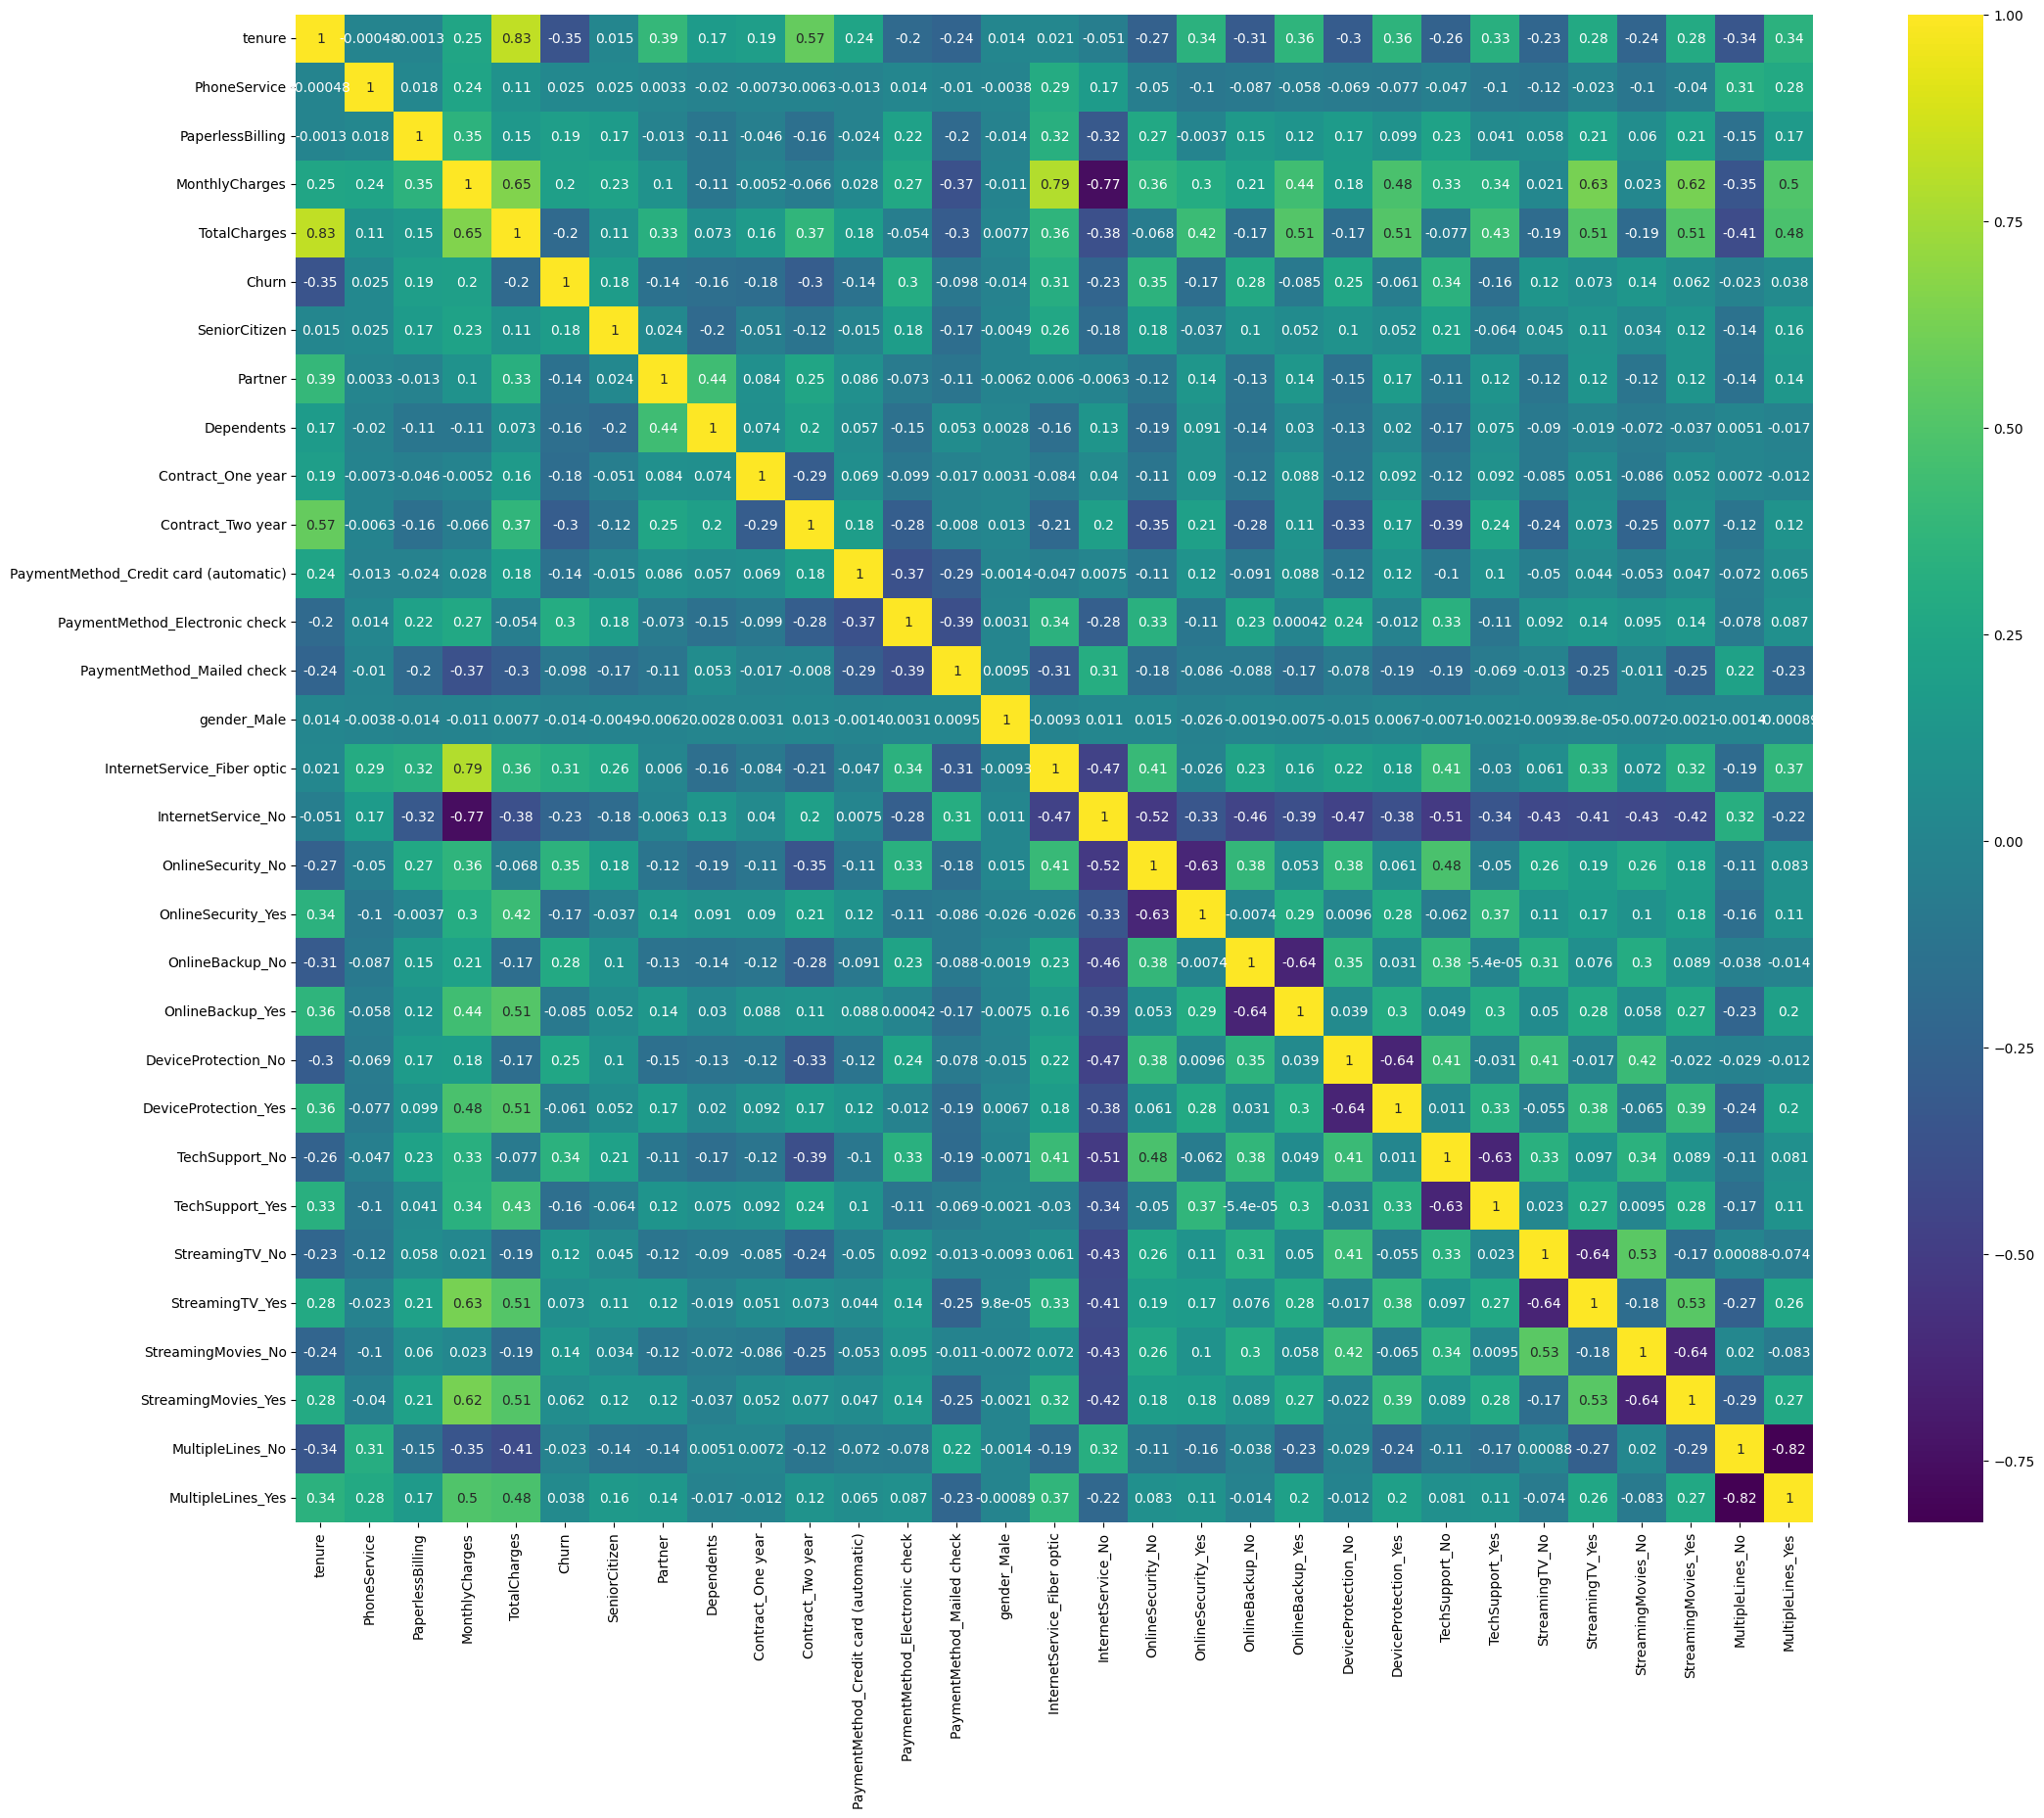

In [ ]:
#Heatmap for all the variables
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(), annot=True, cmap='viridis')
plt.show()

### Step-5: Model Creation

In [ ]:
X_train = df_train.drop('Churn',axis=1)
y_train = df_train['Churn']

In [ ]:
X_train.head()

tenure  PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
879   0.019693             1                 1       -0.338074     -0.276449   
5790  0.305384             0                 1       -0.464443     -0.112702   
6498 -1.286319             1                 1        0.581425     -0.974430   
880  -0.919003             1                 1        1.505913     -0.550676   
2784 -1.163880             1                 1        1.106854     -0.835971   

      SeniorCitizen  Partner  Dependents  Contract_One year  \
879               0        0           0                  0   
5790              0        1           1                  0   
6498              0        0           0                  0   
880               0        0           0                  0   
2784              0        0           1                  0   

      Contract_Two year  ...  DeviceProtection_No  DeviceProtection_Yes  \
879                   0  ...                    1                     0   
5790                  0  ...                    1                     0   
6498                  0  ...                    0                     1   
880                   0  ...                    0                     1   
2784                  0  ...                    0                     1   

      TechSupport_No  TechSupport_Yes  StreamingTV_No  StreamingTV_Yes  \
879                1                0               1                0   
5790               1                0               0                1   
6498               1                0               1                0   
880                0                1               0                1   
2784               0                1               0                1   

      StreamingMovies_No  StreamingMovies_Yes  MultipleLines_No  \
879                    1                    0                 0   
5790                   0                    1                 0   
6498                   1                    0                 1   
880                    0                    1                 1   
2784                   0                    1                 1   

      MultipleLines_Yes  
879                   1  
5790                  0  
6498                  0  
880                   0  
2784                  0  

[5 rows x 30 columns]

In [ ]:
y_train.head()

879     0
5790    0
6498    1
880     1
2784    1
Name: Churn, dtype: int64

In [ ]:
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

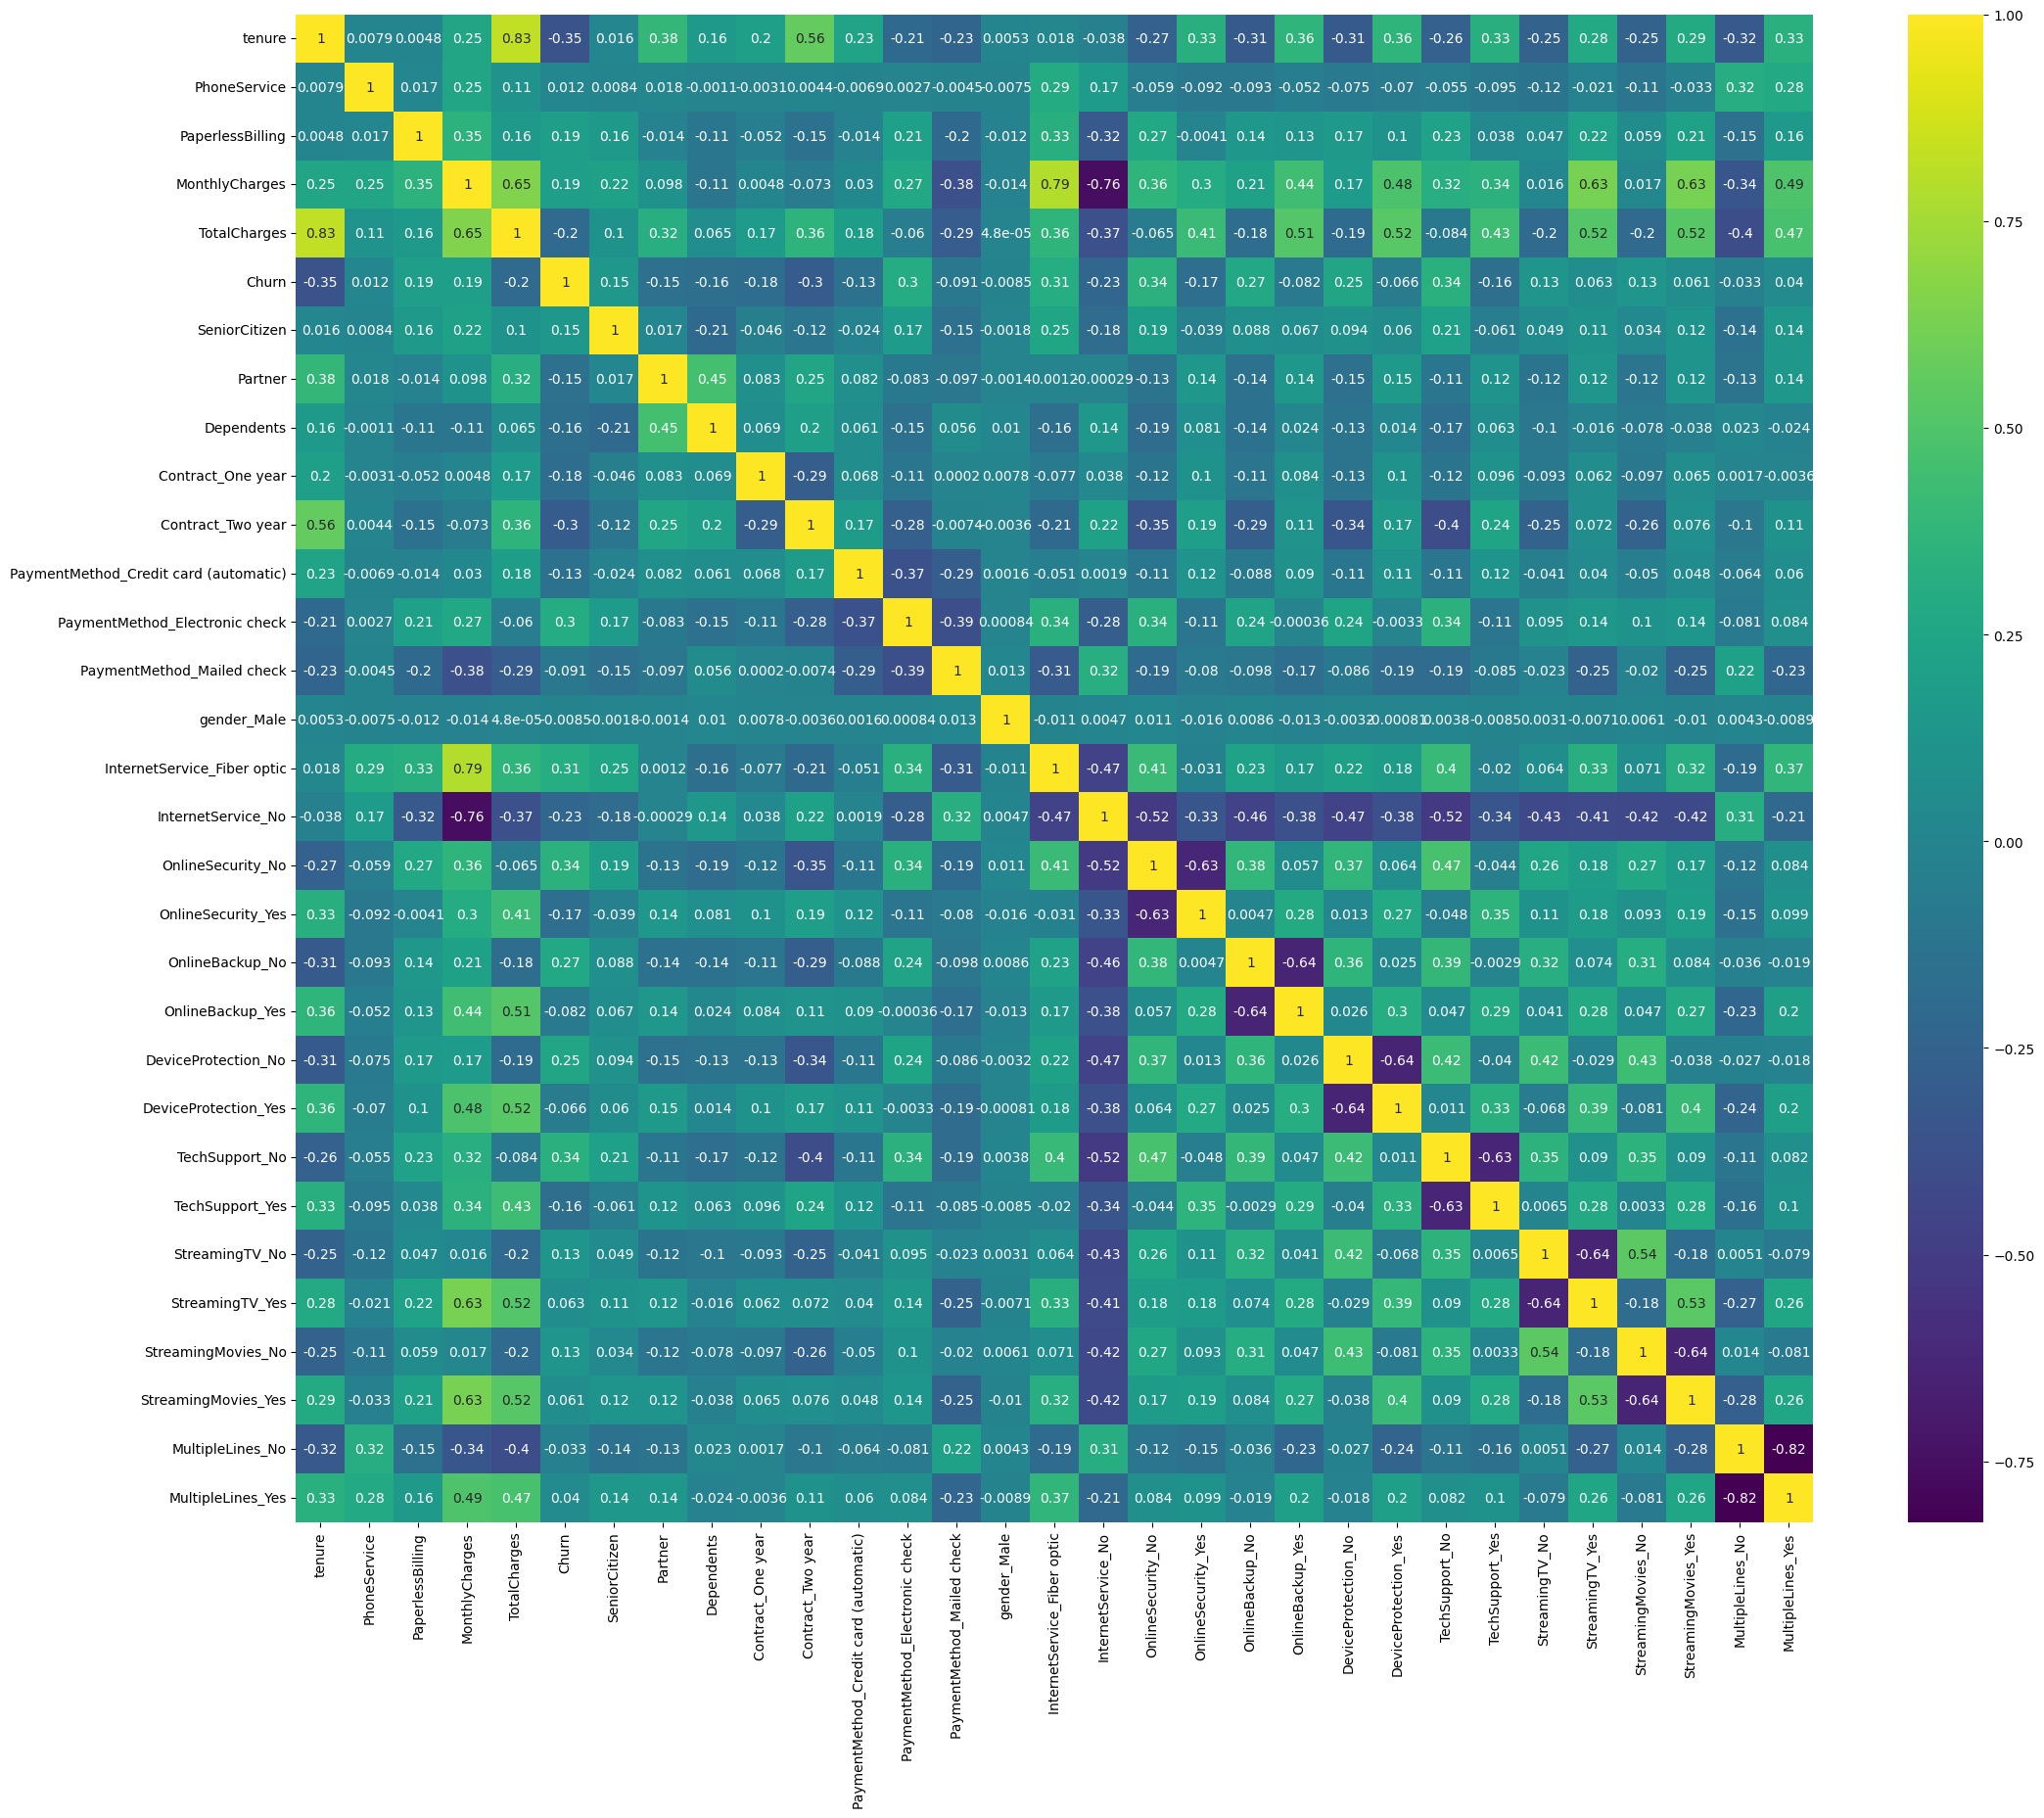

In [ ]:
#Checking the correlations for the features
plt.figure(figsize=(25,20))
sns.heatmap(telecom.corr(), annot=True, cmap='viridis')
plt.show()

In [ ]:
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], axis=1)

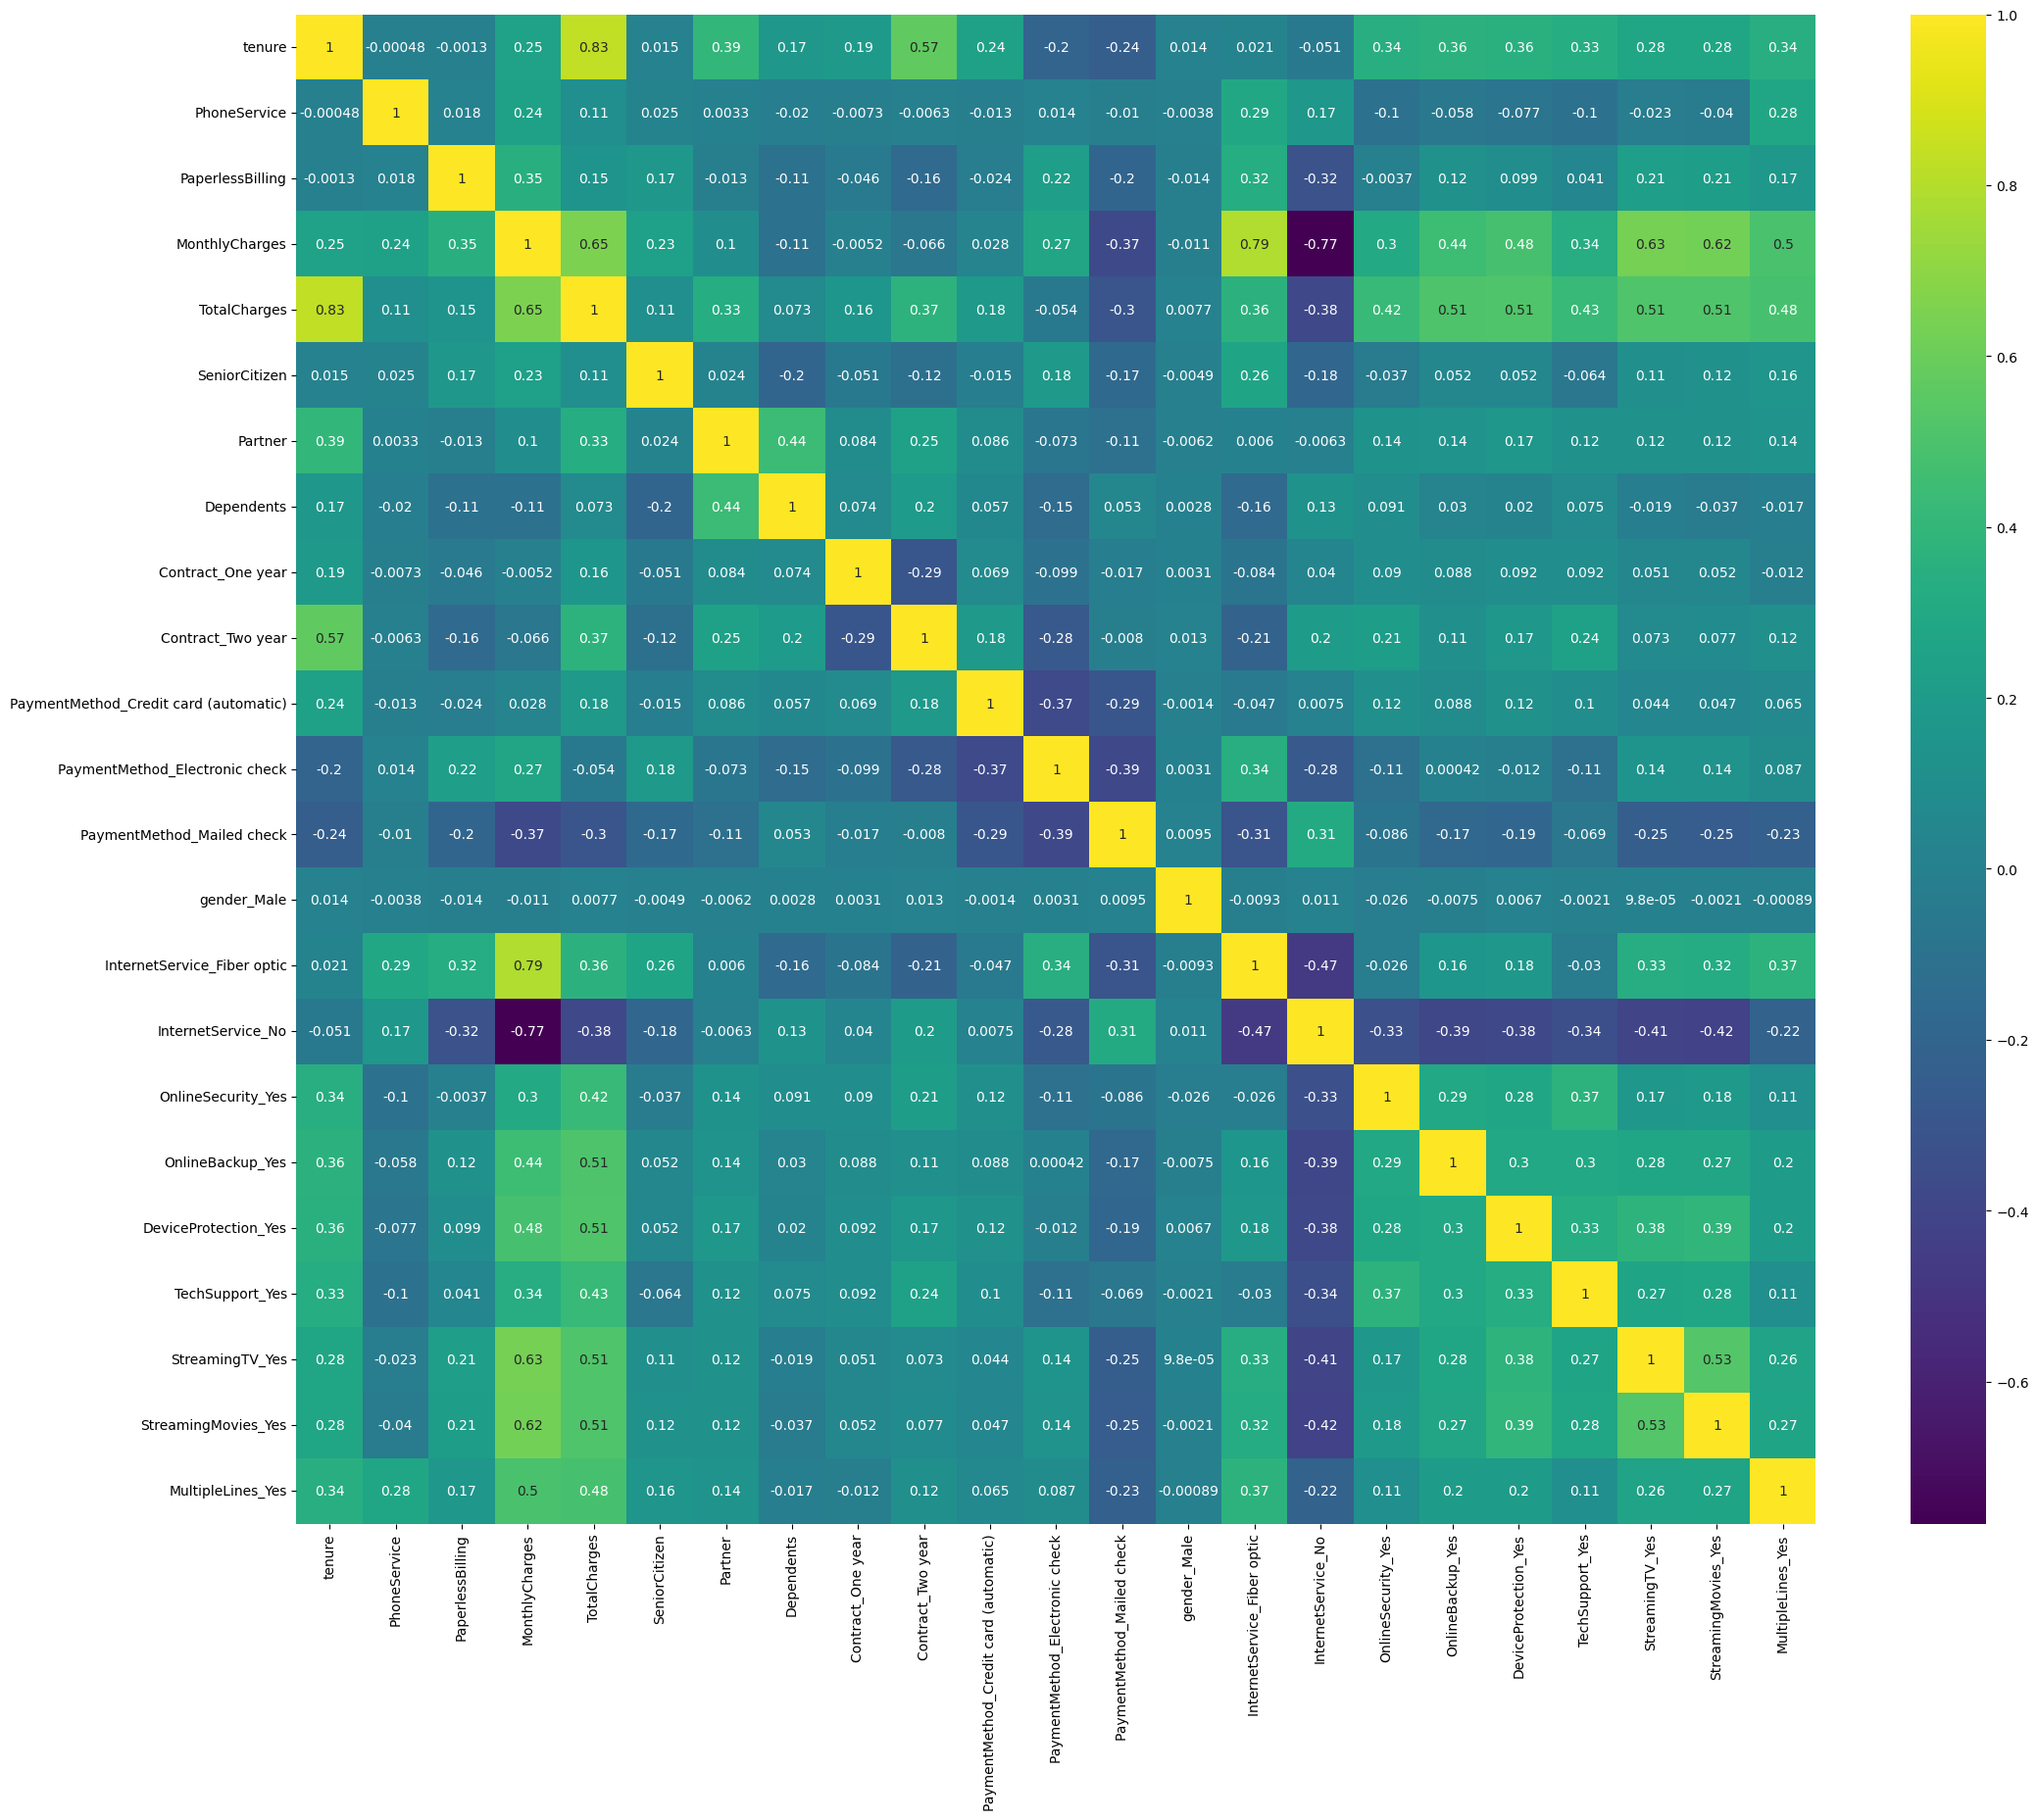

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(X_train.corr(), annot=True, cmap='viridis')
plt.show()

**Logistic model using statsmodel**

In [ ]:
X_train_sm = sm.add_constant(X_train)
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_result = model.fit()
print(model_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Thu, 12 Sep 2024   Deviance:                       4009.4
Time:                        15:46:40   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

**Using RFE**

In [ ]:
logreg = LogisticRegression()

In [ ]:
rfe = RFE(estimator = logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1),
 ('MultipleLines_Yes', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'MultipleLines_Yes'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

**Model-1:**

In [ ]:
X = X_train[col]
X_train_lm = sm.add_constant(X)
log1 = sm.GLM(y_train,X_train_lm,family = sm.families.Binomial())
log_model1 = log1.fit()
print(log_model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Thu, 12 Sep 2024   Deviance:                       4022.2
Time:                        15:46:41   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
y_train_pred = log_model1.predict(X_train_lm)
y_train_pred.head()

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.19264205, 0.27562384, 0.59950707, ..., 0.03924737, 0.12914179,
       0.03145932])

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.192642     879
1      0    0.275624    5790
2      1    0.599507    6498
3      1    0.513571     880
4      1    0.648233    2784

In [ ]:
y_train_pred_final['Predicted'] = [1 if x > 0.5 else 0 for x in y_train_pred_final['Churn_Prob']]
y_train_pred_final.head()

Churn  Churn_Prob  CustID  Predicted
0      0    0.192642     879          0
1      0    0.275624    5790          0
2      1    0.599507    6498          1
3      1    0.513571     880          1
4      1    0.648233    2784          1

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])
confusion

array([[3275,  360],
       [ 574,  713]])

In [ ]:
# Predicted            not_churn                   churn
# Actual
# not_churn        3270(True Negative)      365(False Positive)
# churn            579(False Negative)      708(True Positive)

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.8102397399431126


In [ ]:
#Find the VIF for all the variables
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                          MonthlyCharges  14.85
3                            TotalCharges  10.42
0                                  tenure   7.38
9             InternetService_Fiber optic   5.61
10                     InternetService_No   5.27
6                       Contract_Two year   3.14
12                        StreamingTV_Yes   2.79
13                    StreamingMovies_Yes   2.79
1                        PaperlessBilling   2.76
14                      MultipleLines_Yes   2.38
11                        TechSupport_Yes   1.95
5                       Contract_One year   1.85
8              PaymentMethod_Mailed check   1.73
7   PaymentMethod_Credit card (automatic)   1.45
4                           SeniorCitizen   1.33

In [ ]:
col = col.drop('MonthlyCharges',1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'MultipleLines_Yes'],
      dtype='object')

**Model-2:**

In [ ]:
X = X_train[col]
X_train_lm = sm.add_constant(X)
log2 = sm.GLM(y_train,X_train_lm,family = sm.families.Binomial())
log_model2 = log2.fit()
print(log_model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Thu, 12 Sep 2024   Deviance:                       4046.2
Time:                        15:46:42   Pearson chi2:                 5.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2790
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
y_train_pred = log_model2.predict(X_train_lm)
y_train_pred.head()

879     0.227902
5790    0.228644
6498    0.674892
880     0.615868
2784    0.662260
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.22790197, 0.22864388, 0.67489226, ..., 0.05799564, 0.11065736,
       0.03727123])

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.227902     879
1      0    0.228644    5790
2      1    0.674892    6498
3      1    0.615868     880
4      1    0.662260    2784

In [ ]:
y_train_pred_final['Predicted'] = [1 if x > 0.5 else 0 for x in y_train_pred_final['Churn_Prob']]
y_train_pred_final.head()

Churn  Churn_Prob  CustID  Predicted
0      0    0.227902     879          0
1      0    0.228644    5790          0
2      1    0.674892    6498          1
3      1    0.615868     880          1
4      1    0.662260    2784          1

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])
confusion

array([[3269,  366],
       [ 590,  697]])

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.8057700121901666


In [ ]:
#Find the VIF for all the variables
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                            TotalCharges  7.46
0                                  tenure  6.90
5                       Contract_Two year  3.07
8             InternetService_Fiber optic  2.96
12                    StreamingMovies_Yes  2.62
11                        StreamingTV_Yes  2.59
1                        PaperlessBilling  2.55
9                      InternetService_No  2.44
13                      MultipleLines_Yes  2.27
10                        TechSupport_Yes  1.95
4                       Contract_One year  1.79
7              PaymentMethod_Mailed check  1.63
6   PaymentMethod_Credit card (automatic)  1.42
3                           SeniorCitizen  1.31

In [ ]:
col = col.drop('TotalCharges',1)
col

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'MultipleLines_Yes'],
      dtype='object')

**Model-3:**

In [ ]:
X = X_train[col]
X_train_lm = sm.add_constant(X)
log3 = sm.GLM(y_train,X_train_lm,family = sm.families.Binomial())
log_model3 = log3.fit()
print(log_model3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Thu, 12 Sep 2024   Deviance:                       4051.9
Time:                        15:46:43   Pearson chi2:                 5.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2782
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
y_train_pred = log_model3.predict(X_train_lm)
y_train_pred.head()

879     0.245817
5790    0.265361
6498    0.669410
880     0.630970
2784    0.682916
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.24581699, 0.26536078, 0.66940978, ..., 0.0631844 , 0.10067183,
       0.04835675])

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.245817     879
1      0    0.265361    5790
2      1    0.669410    6498
3      1    0.630970     880
4      1    0.682916    2784

In [ ]:
y_train_pred_final['Predicted'] = [1 if x > 0.5 else 0 for x in y_train_pred_final['Churn_Prob']]
y_train_pred_final.head()

Churn  Churn_Prob  CustID  Predicted
0      0    0.245817     879          0
1      0    0.265361    5790          0
2      1    0.669410    6498          1
3      1    0.630970     880          1
4      1    0.682916    2784          1

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])
confusion

array([[3278,  357],
       [ 597,  690]])

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.8061763510767981


In [ ]:
#Find the VIF for all the variables
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                       Contract_Two year  2.98
7             InternetService_Fiber optic  2.67
11                    StreamingMovies_Yes  2.54
10                        StreamingTV_Yes  2.51
1                        PaperlessBilling  2.45
12                      MultipleLines_Yes  2.24
0                                  tenure  2.04
8                      InternetService_No  2.03
9                         TechSupport_Yes  1.92
3                       Contract_One year  1.78
6              PaymentMethod_Mailed check  1.63
5   PaymentMethod_Credit card (automatic)  1.42
2                           SeniorCitizen  1.31

**This is the final model**

### Step-6: Metrics need to checked after accuracy

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model -- TPR True Positive Rate
TP / float(TP+FN)

0.5361305361305362

In [ ]:
# Let us calculate specificity -- (1-FPR) False Positive Rate
TN / float(TN+FP)

0.9017881705639614

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8459354838709677


In [ ]:
# positive predictive value
print (TP / float(TP+FP))

0.6590257879656161


### Step-7: Understanding ROC Curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

In [ ]:
tpr_fpr = pd.DataFrame({'TPR':tpr, 'FPR':fpr, 'Thresholds':thresholds})
tpr_fpr.head()

TPR       FPR  Thresholds
0  0.000000  0.000000         inf
1  0.002331  0.000000    0.876167
2  0.003885  0.000000    0.871932
3  0.006216  0.000275    0.867574
4  0.006993  0.000275    0.863091

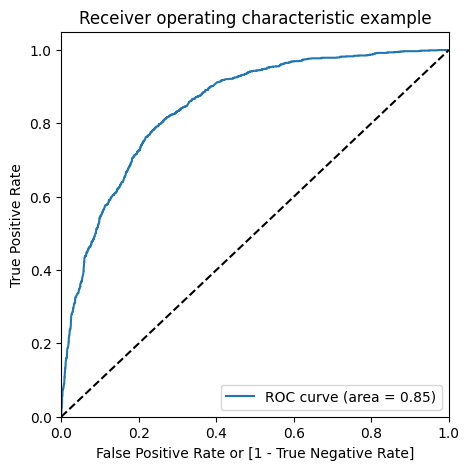

In [ ]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step-8 : Finding optimal cutoff

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.245817     879          0    1    1    1    0    0    0    0   
1      0    0.265361    5790          0    1    1    1    0    0    0    0   
2      1    0.669410    6498          1    1    1    1    1    1    1    1   
3      1    0.630970     880          1    1    1    1    1    1    1    1   
4      1    0.682916    2784          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.614994  0.943279  0.498762
0.2   0.2  0.721861  0.846154  0.677854
0.3   0.3  0.770012  0.776224  0.767813
0.4   0.4  0.790532  0.636364  0.845117
0.5   0.5  0.806176  0.536131  0.901788
0.6   0.6  0.798050  0.380730  0.945805
0.7   0.7  0.776310  0.196581  0.981568
0.8   0.8  0.747867  0.041181  0.998074
0.9   0.9  0.738521  0.000000  1.000000


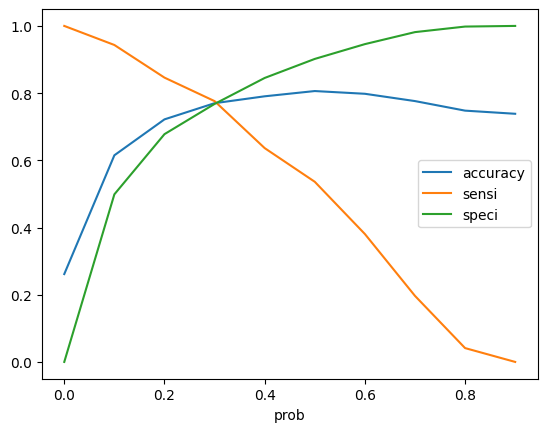

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**The optimal cutoff is 0.3**

The final values with optimal cutoff

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.245817     879          0    1    1    1    0    0    0    0   
1      0    0.265361    5790          0    1    1    1    0    0    0    0   
2      1    0.669410    6498          1    1    1    1    1    1    1    1   
3      1    0.630970     880          1    1    1    1    1    1    1    1   
4      1    0.682916    2784          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                1  
3    0    0    0                1  
4    0    0    0                1

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7700121901665989

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2791,  844],
       [ 288,  999]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7762237762237763

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.7678129298486933

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23218707015130674


In [ ]:
# Positive predictive value
print (TP / float(TP+FP))

0.5420510037981552


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9064631373822669


### Step-9: Making predictions on Test data

In [ ]:
X_test = df_test.drop('Churn',axis=1)
y_test = df_test['Churn']

In [ ]:
X_test.head()

tenure  PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
942       24             1                 1           79.85       2001.00   
3730      57             1                 1          104.50       5921.35   
1761      58             1                 1           24.45       1513.60   
2283       1             1                 1           71.55         71.55   
1872      41             1                 0           19.70        804.25   

      SeniorCitizen  Partner  Dependents  Contract_One year  \
942               0        0           0                  0   
3730              0        1           0                  0   
1761              0        0           0                  0   
2283              0        0           0                  0   
1872              0        1           1                  0   

      Contract_Two year  ...  DeviceProtection_No  DeviceProtection_Yes  \
942                   0  ...                    1                     0   
3730                  0  ...                    0                     1   
1761                  1  ...                    0                     0   
2283                  0  ...                    1                     0   
1872                  1  ...                    0                     0   

      TechSupport_No  TechSupport_Yes  StreamingTV_No  StreamingTV_Yes  \
942                1                0               1                0   
3730               1                0               0                1   
1761               0                0               0                0   
2283               1                0               1                0   
1872               0                0               0                0   

      StreamingMovies_No  StreamingMovies_Yes  MultipleLines_No  \
942                    0                    1                 1   
3730                   0                    1                 0   
1761                   0                    0                 0   
2283                   1                    0                 1   
1872                   0                    0                 1   

      MultipleLines_Yes  
942                   0  
3730                  1  
1761                  1  
2283                  0  
1872                  0  

[5 rows x 30 columns]

In [ ]:
y_test.head()

942     0
3730    1
1761    0
2283    1
1872    0
Name: Churn, dtype: int64

In [ ]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [ ]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], axis=1)

In [ ]:
X_test = X_test[col]
X_test.head()

tenure  PaperlessBilling  SeniorCitizen  Contract_One year  \
942  -0.347623                 1              0                  0   
3730  0.999203                 1              0                  0   
1761  1.040015                 1              0                  0   
2283 -1.286319                 1              0                  0   
1872  0.346196                 0              0                  0   

      Contract_Two year  PaymentMethod_Credit card (automatic)  \
942                   0                                      1   
3730                  0                                      1   
1761                  1                                      1   
2283                  0                                      0   
1872                  1                                      0   

      PaymentMethod_Mailed check  InternetService_Fiber optic  \
942                            0                            1   
3730                           0                            1   
1761                           0                            0   
2283                           1                            1   
1872                           0                            0   

      InternetService_No  TechSupport_Yes  StreamingTV_Yes  \
942                    0                0                0   
3730                   0                0                1   
1761                   1                0                0   
2283                   0                0                0   
1872                   1                0                0   

      StreamingMovies_Yes  MultipleLines_Yes  
942                     1                  0  
3730                    1                  1  
1761                    0                  1  
2283                    0                  0  
1872                    0                  0

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = log_model3.predict(X_test_sm)
y_test_pred.head()

942     0.419725
3730    0.260232
1761    0.008650
2283    0.592626
1872    0.013989
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_test_pred_1.head()

0
942   0.419725
3730  0.260232
1761  0.008650
2283  0.592626
1872  0.013989

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [ ]:
y_pred_final.head()

Churn  CustID         0
0      0     942  0.419725
1      1    3730  0.260232
2      0    1761  0.008650
3      1    2283  0.592626
4      0    1872  0.013989

In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final

Churn  CustID  Churn_Prob
0         0     942    0.419725
1         1    3730    0.260232
2         0    1761    0.008650
3         1    2283    0.592626
4         0    1872    0.013989
...     ...     ...         ...
2105      0    1289    0.023041
2106      0    3508    0.054121
2107      0    6765    0.008348
2108      0    3598    0.503619
2109      0    4987    0.005487

[2110 rows x 3 columns]

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Churn','Churn_Prob']]
y_pred_final.head()

CustID  Churn  Churn_Prob
0     942      0    0.419725
1    3730      1    0.260232
2    1761      0    0.008650
3    2283      1    0.592626
4    1872      0    0.013989

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [ ]:
y_pred_final.head()

CustID  Churn  Churn_Prob  final_predicted
0     942      0    0.419725                1
1    3730      1    0.260232                0
2    1761      0    0.008650                0
3    2283      1    0.592626                1
4    1872      0    0.013989                0

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7407582938388626

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1144,  384],
       [ 163,  419]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7199312714776632

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.7486910994764397

## Using Bagging Classifier

**First try to create the Decision Tree classifier model**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [ ]:
#Spliting of data into train and test sets.
df_train,df_test = train_test_split(telecom,train_size = 0.7,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(4922, 31)
(2110, 31)


In [ ]:
X_train = df_train.drop('Churn',axis=1)
y_train = df_train['Churn']

In [ ]:
X_test = df_test.drop('Churn',axis=1)
y_test = df_test['Churn']

**A basic classifier is created**

In [ ]:
base_classifier = DecisionTreeClassifier(random_state=42)
base_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_test_pred = base_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1528
           1       0.49      0.47      0.48       582

    accuracy                           0.72      2110
   macro avg       0.65      0.64      0.64      2110
weighted avg       0.72      0.72      0.72      2110



**Here the Accuracy is 72% only**

In [ ]:
# Evaluate the classifier using cross-validation
scores_train = cross_val_score(base_classifier, X_train, y_train, cv=5)
print(scores_train)
scores_train.mean()

[0.74213198 0.73096447 0.74390244 0.73373984 0.72865854]


0.7358794519417275

In [ ]:
scores_test = cross_val_score(base_classifier, X_test, y_test, cv=5)
print(scores_test)
scores_test.mean()

[0.72274882 0.71090047 0.70616114 0.6563981  0.7014218 ]


0.6995260663507109

**Bagging Classifier**

In [ ]:
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=20, oob_score=True)

In [ ]:
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=20, oob_score=True)

In [ ]:
y_test_pred = bagging_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1528
           1       0.63      0.48      0.54       582

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



**The Accuracy has increased from 72% to 78% by using Bagging Classifier**

In [ ]:
scores_train = cross_val_score(bagging_classifier, X_train, y_train, cv=5)
print(scores_train)
scores_train.mean()

[0.78883249 0.78375635 0.78353659 0.80487805 0.77845528]


0.7878917502372994

In [ ]:
scores_test = cross_val_score(bagging_classifier, X_test, y_test, cv=5)
print(scores_test)
scores_test.mean()

[0.77014218 0.75829384 0.76540284 0.76066351 0.78909953]


0.7687203791469195

In [ ]:
bagging_classifier.oob_score_

0.7777326290125965

**The Scores of scores_train and scores_test of basics classifier and bagging classifier have been increased from 73-78% and 69-76%**

## Using Decision Trees

In [ ]:
#Spliting of data into train and test sets.
df_train,df_test = train_test_split(telecom,train_size = 0.7,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(4922, 31)
(2110, 31)


In [ ]:
X_train = df_train.drop('Churn',axis=1)
y_train = df_train['Churn']

In [ ]:
X_test = df_test.drop('Churn',axis=1)
y_test = df_test['Churn']

In [ ]:
X_train.shape, X_test.shape

((4922, 30), (2110, 30))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state = 42, max_depth = 4)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Train Set Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Set Accuracy:', accuracy_score(y_test, y_test_pred))

Train Set Accuracy: 0.7992685900040634
Test Set Accuracy: 0.7881516587677725


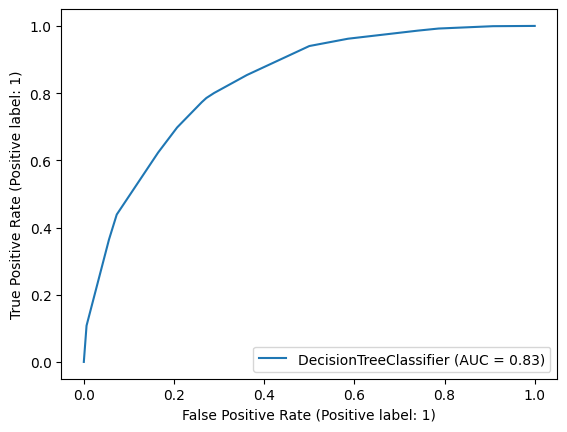

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Assuming 'dt' is your trained model, 'X_train' is your train data, and 'y_train' are the true labels.
RocCurveDisplay.from_estimator(dt, X_train, y_train)

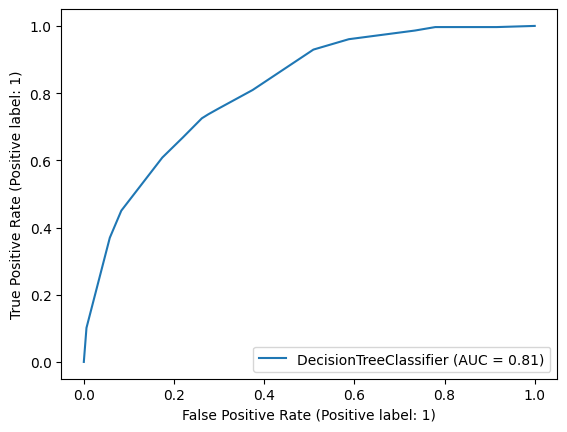

In [ ]:
# Assuming 'dt' is your trained model, 'X_test' is your test data, and 'y_test' are the true labels.
RocCurveDisplay.from_estimator(dt, X_test, y_test)

#### Using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt1 = DecisionTreeClassifier(random_state = 42)

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 500]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt1,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [ ]:
print('The best parameters:',grid_search.best_params_)

The best parameters: {'max_depth': 10, 'min_samples_leaf': 50}


In [ ]:
#the model that is created with these parameters have the accuracy score
print('The best score:',grid_search.best_score_)

The best score: 0.7986589658747929


In [ ]:
print('The best estimator:',grid_search.best_estimator_)

The best estimator: DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, random_state=42)


In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df
#total 30 models are created

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.020179      0.006373         0.004745        0.000625   
1        0.014289      0.002227         0.005970        0.001557   
2        0.014724      0.002258         0.004417        0.000038   
3        0.013954      0.001437         0.004245        0.000174   
4        0.013133      0.000667         0.004451        0.000611   
5        0.014223      0.002247         0.004458        0.000717   
6        0.016717      0.000924         0.006090        0.001999   
7        0.015545      0.000656         0.004440        0.000061   
8        0.015627      0.000227         0.004542        0.000794   
9        0.016118      0.001125         0.004001        0.000059   
10       0.014715      0.000098         0.004452        0.000141   
11       0.013634      0.000473         0.004124        0.000139   
12       0.021342      0.000767         0.004366        0.000274   
13       0.021698      0.001094         0.004220        0.000099   
14       0.022806      0.002389         0.004572        0.000116   
15       0.020850      0.000354         0.004239        0.000135   
16       0.019446      0.000539         0.004232        0.000195   
17       0.013282      0.000274         0.004178        0.000210   
18       0.033176      0.001764         0.004298        0.000271   
19       0.037899      0.009123         0.005444        0.001922   
20       0.030124      0.004132         0.004249        0.000262   
21       0.024792      0.000845         0.004328        0.000071   
22       0.020436      0.000429         0.004195        0.000168   
23       0.014917      0.001978         0.005274        0.001886   
24       0.034572      0.001065         0.004336        0.000134   
25       0.032271      0.001633         0.004278        0.000081   
26       0.028900      0.000741         0.004415        0.000035   
27       0.025275      0.001971         0.004256        0.000092   
28       0.022624      0.001545         0.004078        0.000085   
29       0.013596      0.002957         0.004331        0.001053   

   param_max_depth param_min_samples_leaf  \
0                2                      5   
1                2                     10   
2                2                     20   
3                2                     50   
4                2                    100   
5                2                    500   
6                3                      5   
7                3                     10   
8                3                     20   
9                3                     50   
10               3                    100   
11               3                    500   
12               5                      5   
13               5                     10   
14               5                     20   
15               5                     50   
16               5                    100   
17               5                    500   
18              10                      5   
19              10                     10   
20              10                     20   
21              10                     50   
22              10                    100   
23              10                    500   
24              20                      5   
25              20                     10   
26              20                     20   
27              20                     50   
28              20                    100   
29              20                    500   

                                        params  split0_test_score  \
0      {'max_depth': 2, 'min_samples_leaf': 5}           0.765232   
1     {'max_depth': 2, 'min_samples_leaf': 10}           0.765232   
2     {'max_depth': 2, 'min_samples_leaf': 20}           0.765232   
3     {'max_depth': 2, 'min_samples_leaf': 50}           0.765232   
4    {'max_depth': 2, 'min_samples_leaf': 100}           0.765232   
5    {'max_depth': 2, 'min_samples_leaf': 500}           0.765232   
6      {'max_dep

In [ ]:
dt_best1 = grid_search.best_estimator_
dt_best1

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, random_state=42)

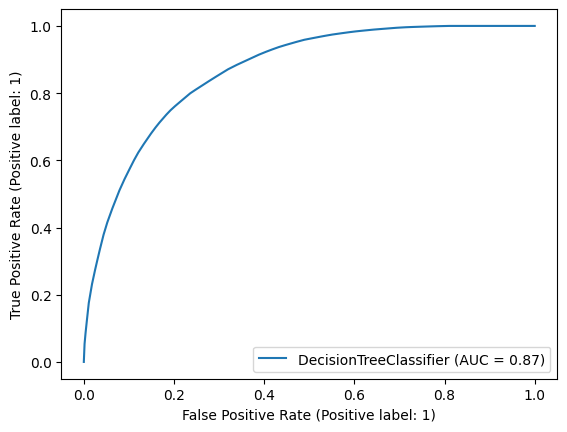

In [ ]:
RocCurveDisplay.from_estimator(dt_best1, X_train, y_train)

## Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state = 100, n_estimators = 10, max_depth = 4, max_features = 5, oob_score =True)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [ ]:
rfc.oob_score_

0.7897196261682243

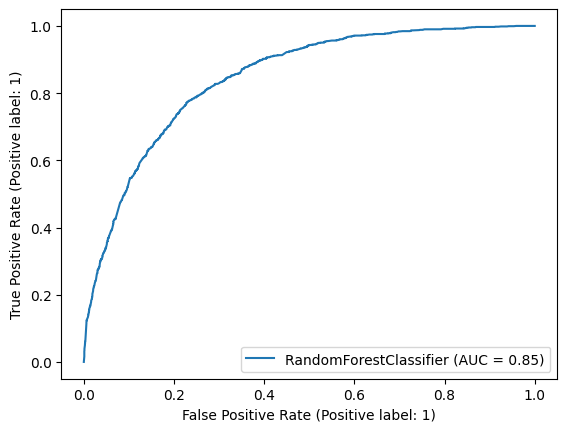

In [ ]:
RocCurveDisplay.from_estimator(rfc, X_train, y_train)

In [ ]:
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [ ]:
print('Train Set Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Set Accuracy:', accuracy_score(y_test, y_test_pred))

Train Set Accuracy: 0.7935798455912231
Test Set Accuracy: 0.7890995260663507


### Using GridSearchCV

In [ ]:
dt2 = RandomForestClassifier(random_state = 42, n_jobs= -1)

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'n_estimators': [10,25,50,100]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt2,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 50}

In [ ]:
#the model that is created with these parameters have the accuracy score
print('The best score:',grid_search.best_score_)

The best score: 0.8045516237047018


In [ ]:
print('The best estimator:',grid_search.best_estimator_)

The best estimator: RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=42)


In [ ]:
dt_best2 = grid_search.best_estimator_
dt_best2

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

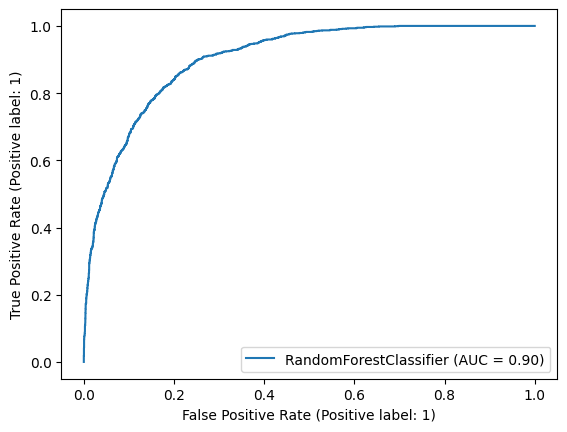

In [ ]:
RocCurveDisplay.from_estimator(dt_best2, X_train, y_train)

In [ ]:
dt_best2.feature_importances_

array([0.1616489 , 0.00291149, 0.01252981, 0.09675052, 0.1421604 ,
       0.01319244, 0.00751215, 0.00593536, 0.03755949, 0.0566489 ,
       0.0075543 , 0.03384472, 0.007344  , 0.01062833, 0.09897412,
       0.01829896, 0.09590185, 0.01548708, 0.02714015, 0.01083036,
       0.01060944, 0.00678994, 0.05672728, 0.01641353, 0.00735293,
       0.00734496, 0.01081521, 0.00742598, 0.00636873, 0.00729867])

In [ ]:
imp_data = pd.DataFrame({'feature': list(X_train.columns),
                         'importance': dt_best2.feature_importances_})
imp_data.sort_values('importance', ascending = False)

feature  importance
0                                  tenure    0.161649
4                            TotalCharges    0.142160
14            InternetService_Fiber optic    0.098974
3                          MonthlyCharges    0.096751
16                      OnlineSecurity_No    0.095902
22                         TechSupport_No    0.056727
9                       Contract_Two year    0.056649
8                       Contract_One year    0.037559
11         PaymentMethod_Electronic check    0.033845
18                        OnlineBackup_No    0.027140
15                     InternetService_No    0.018299
23                        TechSupport_Yes    0.016414
17                     OnlineSecurity_Yes    0.015487
5                           SeniorCitizen    0.013192
2                        PaperlessBilling    0.012530
19                       OnlineBackup_Yes    0.010830
26                     StreamingMovies_No    0.010815
13                            gender_Male    0.010628
20                    DeviceProtection_No    0.010609
10  PaymentMethod_Credit card (automatic)    0.007554
6                                 Partner    0.007512
27                    StreamingMovies_Yes    0.007426
24                         StreamingTV_No    0.007353
25                        StreamingTV_Yes    0.007345
12             PaymentMethod_Mailed check    0.007344
29                      MultipleLines_Yes    0.007299
21                   DeviceProtection_Yes    0.006790
28                       MultipleLines_No    0.006369
7                              Dependents    0.005935
1                            PhoneService    0.002911

## Using PCA

In [ ]:
X_train.shape

(4922, 23)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)

In [ ]:
pca.fit(X_train)

PCA(random_state=42)

In [ ]:
pca.components_

array([[ 4.51013252e-01,  2.00874021e-02,  7.01639045e-02,
         4.79974007e-01,  5.70998609e-01,  3.42906770e-02,
         9.78680497e-02,  1.33467435e-02,  2.99418827e-02,
         7.81273710e-02,  4.43983437e-02,  1.26558899e-02,
        -9.87428422e-02,  3.35996212e-04,  1.44618971e-01,
        -1.31620315e-01,  1.17124712e-01,  1.55481095e-01,
         1.61492419e-01,  1.24652392e-01,  1.76147607e-01,
         1.77166099e-01,  1.57692647e-01],
       [ 5.62923681e-01, -4.09449799e-02, -1.72117497e-01,
        -5.28751991e-01,  1.74133004e-01, -8.28314859e-02,
         1.47808200e-01,  1.41427413e-01,  6.21051024e-02,
         2.32911130e-01,  9.09064500e-02, -2.27957593e-01,
         6.88685612e-02,  1.02814655e-02, -2.96255979e-01,
         2.14485388e-01,  5.51767106e-02, -6.43639289e-03,
        -1.75990164e-02,  3.77046362e-02, -1.20282917e-01,
        -1.17956755e-01, -5.52494943e-02],
       [-2.50134004e-01, -1.81331487e-01, -1.50442078e-01,
         6.76764907e-02, -4.6

In [ ]:
pca.explained_variance_ratio_

array([3.96725472e-01, 1.65340912e-01, 4.74667988e-02, 3.93465997e-02,
       3.53222802e-02, 3.35984987e-02, 3.03414295e-02, 2.91310636e-02,
       2.79345688e-02, 2.67061393e-02, 2.17784867e-02, 2.05509411e-02,
       1.99594530e-02, 1.85975244e-02, 1.74304952e-02, 1.56156982e-02,
       1.39884073e-02, 1.15242076e-02, 8.83240196e-03, 7.39982525e-03,
       6.78625010e-03, 5.57206375e-03, 5.04838056e-05])

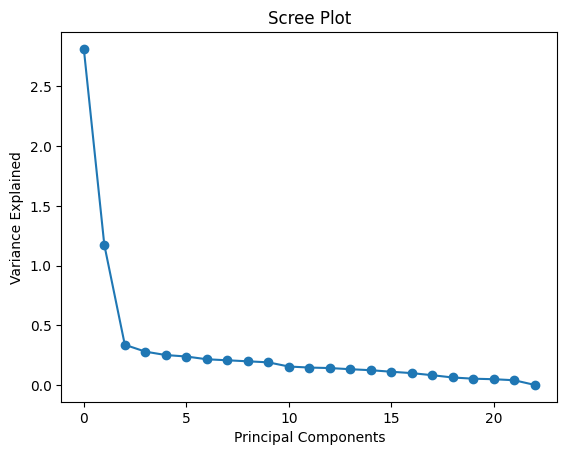

In [ ]:
plt.plot(pca.explained_variance_,marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.39672547, 0.56206638, 0.60953318, 0.64887978, 0.68420206,
       0.71780056, 0.74814199, 0.77727305, 0.80520762, 0.83191376,
       0.85369225, 0.87424319, 0.89420264, 0.91280017, 0.93023066,
       0.94584636, 0.95983477, 0.97135898, 0.98019138, 0.9875912 ,
       0.99437745, 0.99994952, 1.        ])

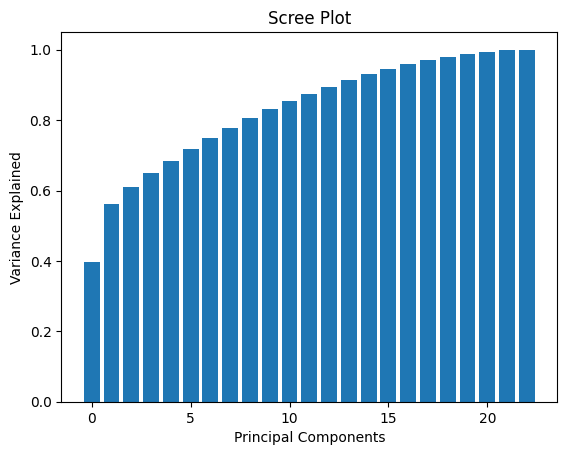

In [ ]:
plt.bar(range(len(cumsum)),cumsum)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

**Perform PCA with 20 components**

In [ ]:
from sklearn.decomposition import IncrementalPCA

In [ ]:
pca_final = IncrementalPCA(n_components=20)

In [ ]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(4922, 20)

In [ ]:
corrmatrix = np.corrcoef(df_train_pca.transpose())
corrmatrix.shape

(20, 20)

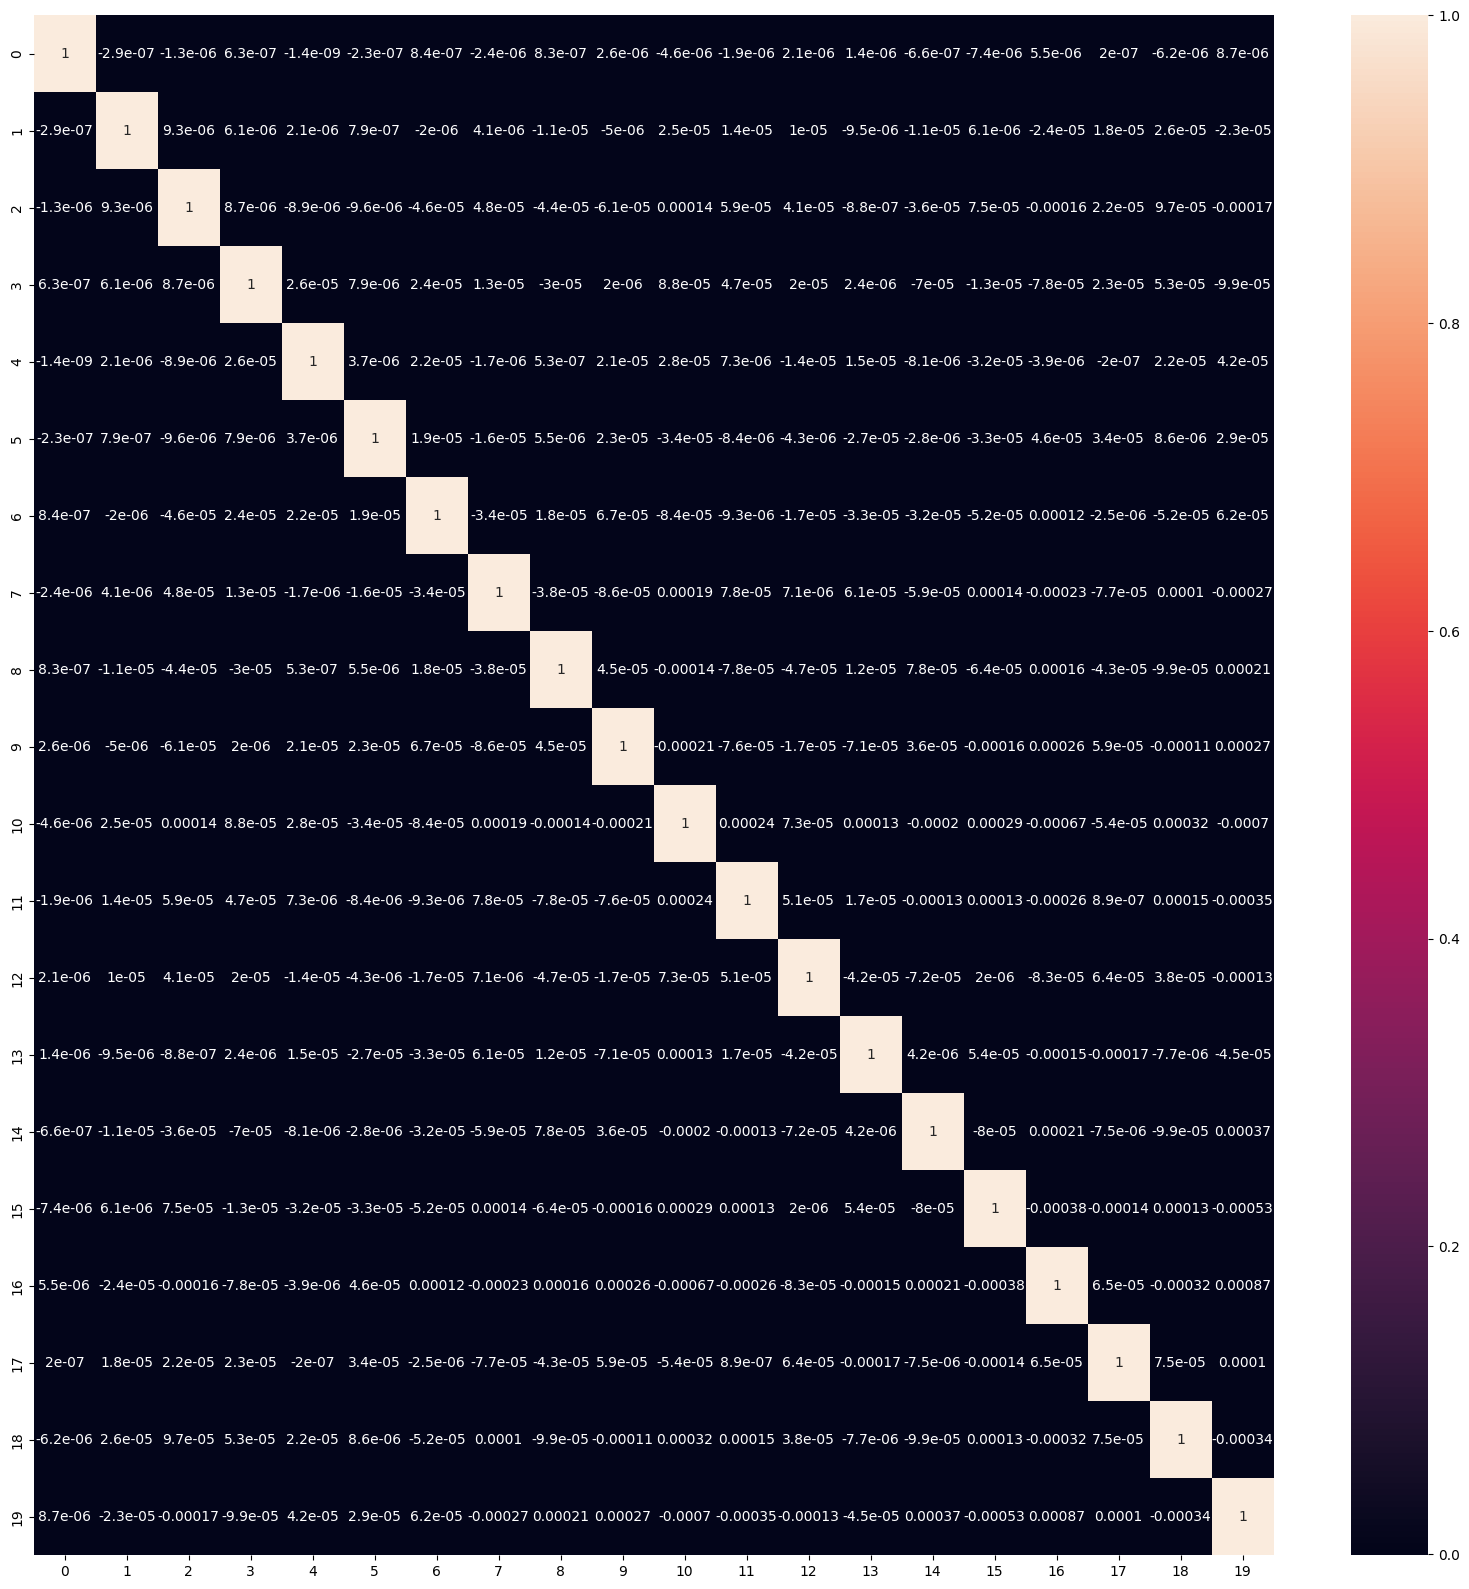

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corrmatrix, annot=True)
plt.show()

In [ ]:
# Get missing columns from X_train
missing_cols = set(X_train.columns) - set(X_test.columns)

# Add missing columns to X_test with a default value (e.g., 0)
for col in missing_cols:
    X_test[col] = 0

# Ensure the order of columns in X_test is the same as in X_train
X_test = X_test[X_train.columns]

In [ ]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2110, 20)

In [ ]:
lr = LogisticRegression()
lr.fit(df_train_pca, y_train)

LogisticRegression()

In [ ]:
y_test_pred = lr.predict(df_test_pca)

In [ ]:
from sklearn import metrics
metrics.roc_auc_score(y_test, y_test_pred)

0.729236384735791

**Making it a little unsupervised**

In [ ]:
pca_again = PCA(0.9)

In [ ]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

(4922, 14)

In [ ]:
lr1 = LogisticRegression()
lr1.fit(df_train_pca2, y_train)

LogisticRegression()

In [ ]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(2110, 14)

In [ ]:
y_test_pred = lr1.predict(df_test_pca2)

In [ ]:
metrics.roc_auc_score(y_test, y_test_pred)

0.6061232705420917